In [1]:
# Acquaring the sample dataset

# !pip -q install gdown

!gdown 1-_a81TB5UQhpLgyTwTVKADikESOLWl7C
!unzip -q "BrainMRI-Samples.zip"

Downloading...
From (original): https://drive.google.com/uc?id=1-_a81TB5UQhpLgyTwTVKADikESOLWl7C
From (redirected): https://drive.google.com/uc?id=1-_a81TB5UQhpLgyTwTVKADikESOLWl7C&confirm=t&uuid=7657a2ae-3566-4763-b59b-2cba72a8fe7a
To: /content/BrainMRI-Samples.zip
100% 19.3M/19.3M [00:00<00:00, 81.8MB/s]


In [2]:
# Installing Libraries

!pip -q install torchio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 324.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.8/175.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Importing Libraries...

import os
import shutil

import numpy as np
import matplotlib.pyplot as plt

import torchio as tio

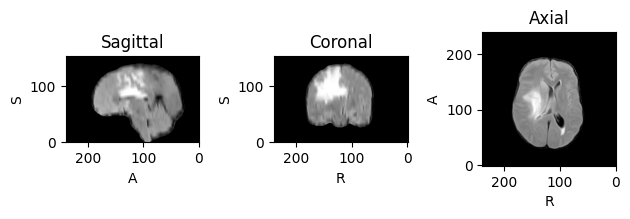

MRI Shape: (1, 240, 240, 155)


In [4]:
# Loading and Viewing MRI Sample

mri_path = '/content/BraTS-SSA-00002-000-t2f.nii.gz'

mri_sample = tio.ScalarImage(mri_path)
mri_sample.plot()
print("MRI Shape:",mri_sample.shape)

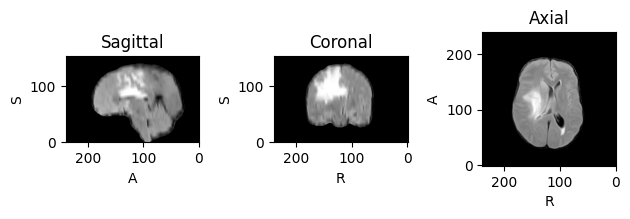

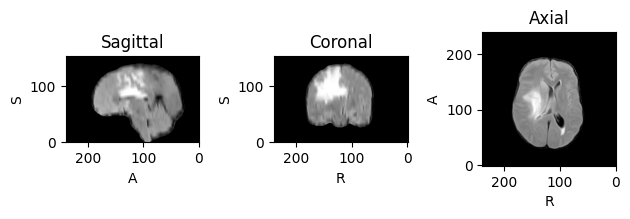

In [ ]:
 # Intensity Rescaling

min_val = -1
max_val = 1

# Defining and Applying Intensity Rescaler
rescaler = tio.RescaleIntensity((min_val, max_val))
mri_rescaled = rescaler(mri_sample) # Applying intensity rescaler

# Visualizing MRI (Top: Original Sample, Bottom: Rescaled MRI)
mri_sample.plot()
mri_rescaled.plot()

Text(0.5, 1.0, 'MRI Rescaled Histogram')

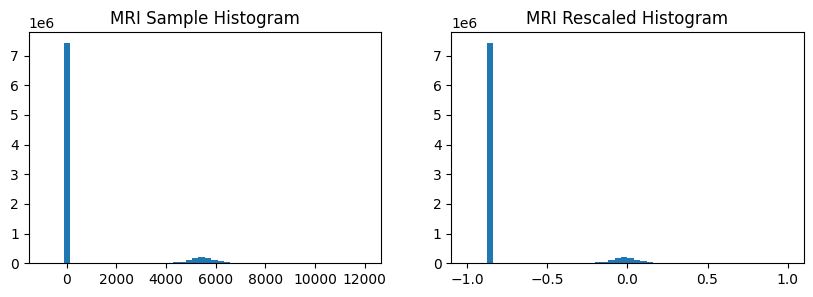

In [ ]:
# Plotting MRI Sample Histogram
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(mri_sample.data.flatten(), bins=50)
plt.title('MRI Sample Histogram')

# Plotting Rescaled MRI Histogram
plt.subplot(1, 2, 2)
plt.hist(mri_rescaled.data.flatten(), bins=50)
plt.title('MRI Rescaled Histogram')

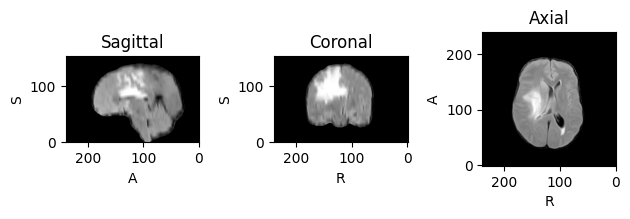

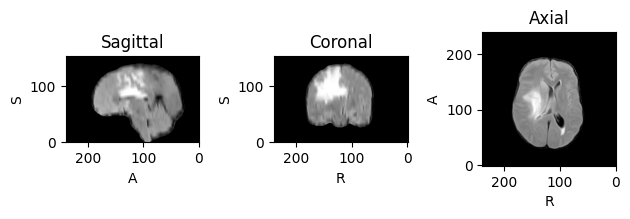

In [ ]:
# Defining and Applying ZNormalization

z_transform = tio.ZNormalization()
mri_znormalized = z_transform(mri_sample)

# Visualizing MRI (Top: Original Sample, Bottom: ZNormalized MRI)
mri_sample.plot()
mri_znormalized.plot()

Text(0.5, 1.0, 'MRI ZNormalized Histogram')

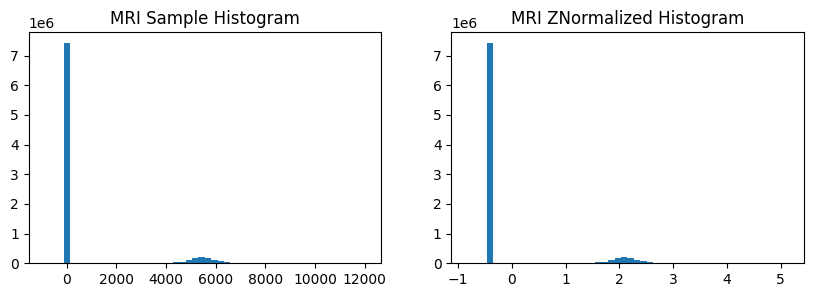

In [ ]:
# Plotting MRI Sample Histogram
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.hist(mri_sample.data.flatten(), bins=50)
plt.title('MRI Sample Histogram')

# Plotting ZNormalized MRI Histogram
plt.subplot(1, 2, 2)
plt.hist(mri_znormalized.data.flatten(), bins=50)
plt.title('MRI ZNormalized Histogram')

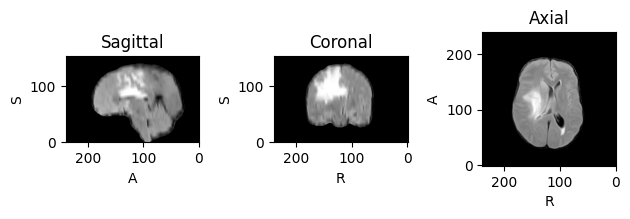

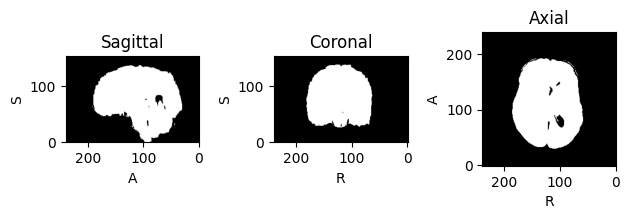

In [ ]:
# Intensity Clamping Transforms

min_val = 2500
max_val = 3000
clamp_transform = tio.Clamp(min_val, max_val)
mri_clamped = clamp_transform(mri_sample)

# Visualizing MRI (Top: Original Sample, Bottom: Clamped MRI)
mri_sample.plot()
mri_clamped.plot()

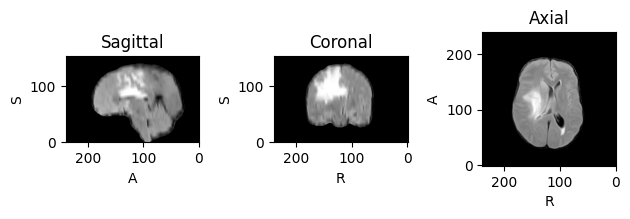

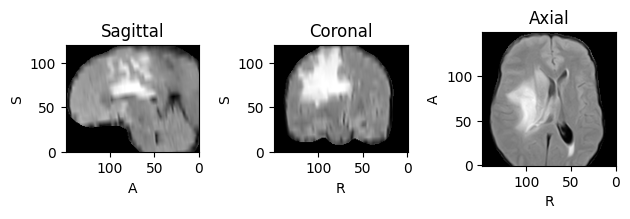

(1, 150, 150, 120)

In [ ]:
# Defining traget_shape with Width, Height and Depth
target_shape = (150, 150, 120)

# Defining and Applying Crop
crop_transform = tio.CropOrPad(target_shape)

mri_cropped = crop_transform(mri_sample)

# Visualizing MRI (Top: Original Sample, Bottom: Cropped MRI)
mri_sample.plot()
mri_cropped.plot()
mri_cropped.shape

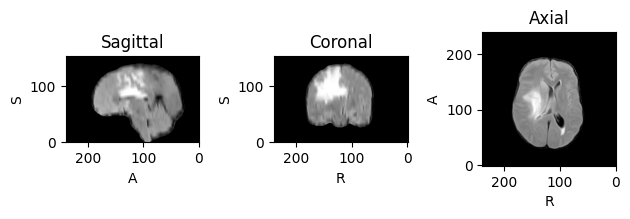

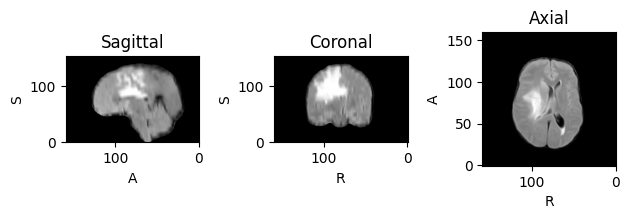

Resampled shape: (1, 160, 160, 155)


In [ ]:
# Defining traget_space of Width, Height and Depth
target_spacing = (1.5, 1.5, 1)

resample_transform = tio.Resample(target_spacing)

# Apply the resampling transform to your MRI sample
mri_resampled = resample_transform(mri_sample)

# Visualizing MRI (Top: Original Sample, Bottom: Resampled MRI
mri_sample.plot()
mri_resampled.plot()
print("Resampled shape:", mri_resampled.shape)

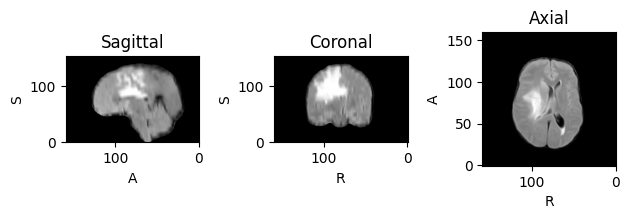

In [5]:
# applying several transforms

target_spacing = (1.5, 1.5, 1)

# Define transformation pipeline
preprocess_pipeline = tio.Compose([
    tio.ZNormalization(),
    tio.Resample(target_spacing)
])

# Apply the composed transforms to the MRI sample
mri_transformed = preprocess_pipeline(mri_sample)
mri_transformed.plot()